In [1]:
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.python.platform import gfile

In [2]:
path = "./Face_Mask_Classifier/TF_FrozenModel.pb"
output_node_names = ['Reshape']
sess =  tf.Session() 

print("load graph")
with gfile.FastGFile(path,'rb') as f:
    graph_def = tf.GraphDef()
graph_def.ParseFromString(f.read())
sess.graph.as_default()
tf.import_graph_def(graph_def, name='')


load graph
Instructions for updating:
Use tf.gfile.GFile.


In [3]:
for node in tf.get_default_graph().as_graph_def().node :
    print(node.name)

input_tensor
Placeholder
Dropout
conv2d/kernel
conv2d/bias
conv2d/Conv2D/ReadVariableOp
conv2d/Conv2D
conv2d/BiasAdd/ReadVariableOp
conv2d/BiasAdd
batch_normalization/gamma
batch_normalization/beta
batch_normalization/moving_mean
batch_normalization/moving_variance
batch_normalization/cond/Switch
batch_normalization/cond/switch_t
batch_normalization/cond/pred_id
batch_normalization/cond/ReadVariableOp/Switch
batch_normalization/cond/ReadVariableOp
batch_normalization/cond/ReadVariableOp_1/Switch
batch_normalization/cond/ReadVariableOp_1
batch_normalization/cond/Const
batch_normalization/cond/Const_1
batch_normalization/cond/FusedBatchNormV3/Switch
batch_normalization/cond/FusedBatchNormV3
batch_normalization/cond/ReadVariableOp_2/Switch
batch_normalization/cond/ReadVariableOp_2
batch_normalization/cond/ReadVariableOp_3/Switch
batch_normalization/cond/ReadVariableOp_3
batch_normalization/cond/FusedBatchNormV3_1/ReadVariableOp/Switch
batch_normalization/cond/FusedBatchNormV3_1/ReadVariab

batch_normalization_7/cond/ReadVariableOp_2/Switch
batch_normalization_7/cond/ReadVariableOp_2
batch_normalization_7/cond/ReadVariableOp_3/Switch
batch_normalization_7/cond/ReadVariableOp_3
batch_normalization_7/cond/FusedBatchNormV3_1/ReadVariableOp/Switch
batch_normalization_7/cond/FusedBatchNormV3_1/ReadVariableOp
batch_normalization_7/cond/FusedBatchNormV3_1/ReadVariableOp_1/Switch
batch_normalization_7/cond/FusedBatchNormV3_1/ReadVariableOp_1
batch_normalization_7/cond/FusedBatchNormV3_1/Switch
batch_normalization_7/cond/FusedBatchNormV3_1
batch_normalization_7/cond/Merge
re_lu_7/Relu
dropout_7/cond/Switch
dropout_7/cond/switch_t
dropout_7/cond/pred_id
dropout_7/cond/dropout/Shape/Switch
dropout_7/cond/dropout/Shape
dropout_7/cond/dropout/random_uniform/min
dropout_7/cond/dropout/random_uniform/max
dropout_7/cond/dropout/random_uniform/RandomUniform
dropout_7/cond/dropout/random_uniform/sub
dropout_7/cond/dropout/random_uniform/mul
dropout_7/cond/dropout/random_uniform
dropout_7/c

In [4]:
input_ = sess.graph.get_tensor_by_name('input_tensor:0')
dropout = sess.graph.get_tensor_by_name('Dropout:0')
bn_tensor = sess.graph.get_tensor_by_name('Placeholder:0')
output = sess.graph.get_tensor_by_name('Reshape:0')

In [5]:
import os
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        if img is not None:
            images.append(img)
    return images
folder = "/home/grace/Projects/FaceMask_Detection/Test_Images/"
img = load_images_from_folder(folder)

In [6]:
x = img[3]

Person wih Mask


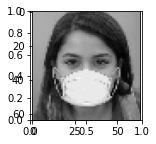

In [7]:
fig, ax = plt.subplots(figsize=(2,2))
x = np.reshape(x, (224,224,3))
x = cv2.resize(x, (64, 64)) 

ans = sess.run([output], feed_dict={input_ : [x], dropout : 0.0, bn_tensor : True})
fig.add_subplot(1,1,1)
plt.imshow(x)
if np.argmax(ans) == 0:
    print("Person wih Mask")
else:
    print("Person Without Mask")